# Sentiment Analysis using Python
This notebook covers a step-by-step guide to building a sentiment analysis model using Python.
We will use the IMDb dataset and apply different machine learning techniques to classify text sentiment.

## Step 1: Import Libraries
We start by importing the necessary libraries for data processing, visualization, and machine learning.

In [7]:
%pip install nltk
%pip install seaborn
%pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 11.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 11.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:

import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
    

In [11]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Step 2: Load Dataset
We will use the IMDb movie reviews dataset, which consists of positive and negative sentiment labels.

In [27]:

import nltk
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews

def load_imdb_dataset():
    data = []
    labels = []
    for category in movie_reviews.categories():
        for fileid in movie_reviews.fileids(category):
            data.append(movie_reviews.raw(fileid))
            labels.append(category)
    return pd.DataFrame({'review': data, 'sentiment': labels})

df = load_imdb_dataset()
df.head(2)
    

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/efecaliskan/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


,review,sentiment
0,"plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat's the deal ? \nwatch the movie and "" sorta "" find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it's simply too jumbled . \nit starts off "" normal "" but then downshifts into this "" fantasy "" world in which you , as an audience member , have no idea what's going on . \nthere are dreams , there are characters coming back from the dead , there are others who look like the dead , there are strange apparitions , there are disappearances , there are a looooot of chase scenes , there are tons of weird things that happen , and most of it is simply not explained . \nnow i personally don't mind trying to unravel a film every now and then , but when all it does is give me the same clue over and over again , i get kind of fed up after a while , which is this film's biggest problem . \nit's obviously got this big secret to hide , but it seems to want to hide it completely until its final five minutes . \nand do they make things entertaining , thrilling or even engaging , in the meantime ? \nnot really . \nthe sad part is that the arrow and i both dig on flicks like this , so we actually figured most of it out by the half-way point , so all of the strangeness after that did start to make a little bit of sense , but it still didn't the make the film all that more entertaining . \ni guess the bottom line with movies like this is that you should always make sure that the audience is "" into it "" even before they are given the secret password to enter your world of understanding . \ni mean , showing melissa sagemiller running away from visions for about 20 minutes throughout the movie is just plain lazy ! ! \nokay , we get it . . . there \nare people chasing her and we don't know who they are . \ndo we really need to see it over and over again ? \nhow about giving us different scenes offering further insight into all of the strangeness going down in the movie ? \napparently , the studio took this film away from its director and chopped it up themselves , and it shows . \nthere might've been a pretty decent teen mind-fuck movie in here somewhere , but i guess "" the suits "" decided that turning it into a music video with little edge , would make more sense . \nthe actors are pretty good for the most part , although wes bentley just seemed to be playing the exact same character that he did in american beauty , only in a new neighborhood . \nbut my biggest kudos go out to sagemiller , who holds her own throughout the entire film , and actually has you feeling her character's unraveling . \noverall , the film doesn't stick because it doesn't entertain , it's confusing , it rarely excites and it feels pretty redundant for most of its runtime , despite a pretty cool ending and explanation to all of the craziness that came before it . \noh , and by the way , this is not a horror or teen slasher flick . . . it's \njust packaged to look that way because someone is apparently assuming that the genre is still hot with the kids . \nit also wrapped production two years ago and has been sitting on the shelves ever since . \nwhatever . . . skip \nit ! \nwhere's joblo coming from ? \na nightmare of elm street 3 ( 7/10 ) - blair witch 2 ( 7/10 ) - the crow ( 9/10 ) - the crow : salva

In [28]:
df['sentiment'] = df['sentiment'].map({'pos': 1, 'neg': 0})
df.head(2)

,review,sentiment
0,"plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat's the deal ? \nwatch the movie and "" sorta "" find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it's simply too jumbled . \nit starts off "" normal "" but then downshifts into this "" fantasy "" world in which you , as an audience member , have no idea what's going on . \nthere are dreams , there are characters coming back from the dead , there are others who look like the dead , there are strange apparitions , there are disappearances , there are a looooot of chase scenes , there are tons of weird things that happen , and most of it is simply not explained . \nnow i personally don't mind trying to unravel a film every now and then , but when all it does is give me the same clue over and over again , i get kind of fed up after a while , which is this film's biggest problem . \nit's obviously got this big secret to hide , but it seems to want to hide it completely until its final five minutes . \nand do they make things entertaining , thrilling or even engaging , in the meantime ? \nnot really . \nthe sad part is that the arrow and i both dig on flicks like this , so we actually figured most of it out by the half-way point , so all of the strangeness after that did start to make a little bit of sense , but it still didn't the make the film all that more entertaining . \ni guess the bottom line with movies like this is that you should always make sure that the audience is "" into it "" even before they are given the secret password to enter your world of understanding . \ni mean , showing melissa sagemiller running away from visions for about 20 minutes throughout the movie is just plain lazy ! ! \nokay , we get it . . . there \nare people chasing her and we don't know who they are . \ndo we really need to see it over and over again ? \nhow about giving us different scenes offering further insight into all of the strangeness going down in the movie ? \napparently , the studio took this film away from its director and chopped it up themselves , and it shows . \nthere might've been a pretty decent teen mind-fuck movie in here somewhere , but i guess "" the suits "" decided that turning it into a music video with little edge , would make more sense . \nthe actors are pretty good for the most part , although wes bentley just seemed to be playing the exact same character that he did in american beauty , only in a new neighborhood . \nbut my biggest kudos go out to sagemiller , who holds her own throughout the entire film , and actually has you feeling her character's unraveling . \noverall , the film doesn't stick because it doesn't entertain , it's confusing , it rarely excites and it feels pretty redundant for most of its runtime , despite a pretty cool ending and explanation to all of the craziness that came before it . \noh , and by the way , this is not a horror or teen slasher flick . . . it's \njust packaged to look that way because someone is apparently assuming that the genre is still hot with the kids . \nit also wrapped production two years ago and has been sitting on the shelves ever since . \nwhatever . . . skip \nit ! \nwhere's joblo coming from ? \na nightmare of elm street 3 ( 7/10 ) - blair witch 2 ( 7/10 ) - the crow ( 9/10 ) - the crow : salva

In [ ]:
pd.reset_option('display.max_colwidth')
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

## Step 3: Data Preprocessing & Cleaning
We clean the text by removing stopwords, punctuation, and special characters.

In [16]:

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned_review'] = df['review'].apply(clean_text)
df.head(1)
    

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/efecaliskan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/efecaliskan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/efecaliskan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,review,sentiment,cleaned_review
0,"plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat's the deal ? \nwatch the movie and "" sorta "" find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it's simply too jumbled . \nit starts off "" normal "" but then downshifts into this "" fantasy "" world in which you , as an audience member , have no idea what's going on . \nthere are dreams , there are characters coming back from the dead , there are others who look like the dead , there are strange apparitions , there are disappearances , there are a looooot of chase scenes , there are tons of weird things that happen , and most of it is simply not explained . \nnow i personally don't mind trying to unravel a film every now and then , but when all it does is give me the same clue over and over again , i get kind of fed up after a while , which is this film's biggest problem . \nit's obviously got this big secret to hide , but it seems to want to hide it completely until its final five minutes . \nand do they make things entertaining , thrilling or even engaging , in the meantime ? \nnot really . \nthe sad part is that the arrow and i both dig on flicks like this , so we actually figured most of it out by the half-way point , so all of the strangeness after that did start to make a little bit of sense , but it still didn't the make the film all that more entertaining . \ni guess the bottom line with movies like this is that you should always make sure that the audience is "" into it "" even before they are given the secret password to enter your world of understanding . \ni mean , showing melissa sagemiller running away from visions for about 20 minutes throughout the movie is just plain lazy ! ! \nokay , we get it . . . there \nare people chasing her and we don't know who they are . \ndo we really need to see it over and over again ? \nhow about giving us different scenes offering further insight into all of the strangeness going down in the movie ? \napparently , the studio took this film away from its director and chopped it up themselves , and it shows . \nthere might've been a pretty decent teen mind-fuck movie in here somewhere , but i guess "" the suits "" decided that turning it into a music video with little edge , would make more sense . \nthe actors are pretty good for the most part , although wes bentley just seemed to be playing the exact same character that he did in american beauty , only in a new neighborhood . \nbut my biggest kudos go out to sagemiller , who holds her own throughout the entire film , and actually has you feeling her character's unraveling . \noverall , the film doesn't stick because it doesn't entertain , it's confusing , it rarely excites and it feels pretty redundant for most of its runtime , despite a pretty cool ending and explanation to all of the craziness that came before it . \noh , and by the way , this is not a horror or teen slasher flick . . . it's \njust packaged to look that way because someone is apparently assuming that the genre is still hot with the kids . \nit also wrapped production two years ago and has been sitting on the shelves ever since . \nwhatever . . . skip \nit ! \nwhere's joblo coming from ? \na nightmare of elm street 3 ( 7/10 ) - blair witch 2 ( 7/10 ) - the crow ( 9/10 ) - t

## Step 4: Feature Extraction (Bag of Words & TF-IDF)
Convert text into numerical representation using Bag of Words and TF-IDF.

In [17]:

vectorizer = CountVectorizer(ngram_range=(1,2))  # Using bigrams
X = vectorizer.fit_transform(df['cleaned_review'])

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['cleaned_review'])
    

In [21]:
X_tfidf.shape

(2000, 38742)

## Step 5: Splitting Data
We split the dataset into training and testing sets.

In [22]:

X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'], test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, df['sentiment'], test_size=0.2, random_state=42)
    

## Step 6: Training Models
We train machine learning models including Naïve Bayes and Logistic Regression.

In [23]:

# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
    

Naïve Bayes Accuracy: 0.8175


In [24]:

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
    

Logistic Regression Accuracy: 0.8175


## Step 7: Model Evaluation
We evaluate models using classification reports and confusion matrices.

In [25]:

print("Classification Report for Naïve Bayes:")
print(classification_report(y_test, y_pred_nb))

print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
    

Classification Report for Naïve Bayes:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       199
           1       0.85      0.78      0.81       201

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       199
           1       0.82      0.82      0.82       201

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



## Step 8: Confusion Matrix
Visualizing model performance using a confusion matrix.

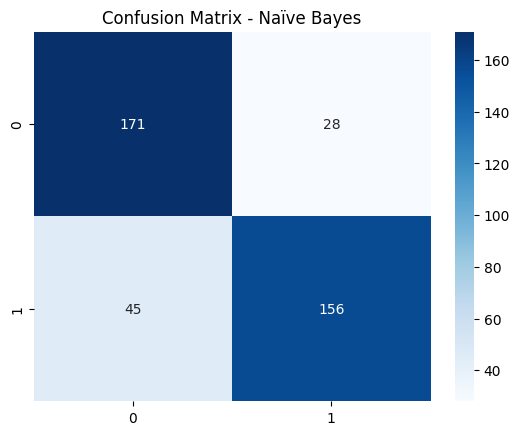

In [26]:

sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Naïve Bayes")
plt.show()
    

## Conclusion
- We performed sentiment analysis using the IMDb dataset.
- Applied text cleaning, feature extraction (BoW, TF-IDF), and trained ML models.
- Evaluated models using accuracy, classification report, and confusion matrix.
Next steps could include using deep learning models such as LSTMs or BERT for improved performance.